<a href="https://colab.research.google.com/github/barauna-lo/Code_Library/blob/main/Climate_Collab_Part_3_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/drive/1iGfkeEbDQKaU7tmDigS_kR2O6P-SmPKQ?usp=sharing"><p align="center">Homepage</p></a>


This work is derived from [Open Hackathons](https://www.openhackathons.org/) Github repository, and can be accessed [here](https://github.com/openhackathons-org)  

## Licensing
This material is released by OpenACC-Standard.org, in collaboration with NVIDIA Corporation, under the Creative Commons Attribution 4.0 International (CC BY 4.0).

## Instructions

Kindly change runtime type to use GPU before running any of the cells. 

```
Runtime ->  Change Runtime type -> Select GPU from the drop down box.
```


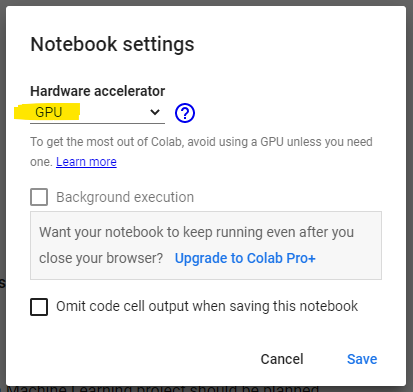


Run the below cell to install required libraries and import dataset into the Notebook.

In [ ]:
# This will setup all files required to run the collab notebook for you, this will take around 2 minutes and is a one-time process. 
!wget "https://gist.githubusercontent.com/aswinkumar1999/ad51d8562b0a83b0ca6eca461e1feae5/raw/97f48a48c816b785d6ecf4d48e0de1cfd143a033/setup_collab.py" && python3 setup_collab.py

# Challenge :

In this exercise participant need to tune and work on improving overall acuracy of our model. 

To help you get started by pointing out some obvious ways in which you can make the model more efficient. 

- Epochs  
- Batch Size 
- Optimizers : We have used SGD as a optimizer. Participant can try applying other optimizer and test to obtain quick convergence.
- Data Augmentation : Remember, we mentioned we have an imbalanced dataset. You could try differnet augmentation techniques for the minority classes.
- Model : If you have exploited all the bbove methods to improve your model, you can change the model by adding more Layers to it and see if that improves that accuracy.

Note, before you start tweaking and training your model ,it would be worthwhile to refer to these to see how they affect your model : 

[Epochs impact on Overfitting](https://datascience.stackexchange.com/questions/27561/can-the-number-of-epochs-influence-overfitting ) 


[Effect of Batch Size on Training Dynamics](https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e)

[Introduction to Optimizers](https://algorithmia.com/blog/introduction-to-optimizers)

# Training the Model with Data Augmentation : 


We created a new function called `augmentation(name,category,filenames,labels,i)` and here you can add more samples to Category which have imbalanced data.  

In [ ]:
import sys
sys.path.append('/content/python/source_code')

from utils import * 

def augmentation(name,category,filenames,labels,i):
    # Important Constants
    file_path = "/content/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/Dataset/Aug"
    images = []
    (h, w) = (232,232)
    center = (w / 2, h / 2)
    angle90 = 90
    angle180 = 180
    angle270 = 270
    scale = 1.0
    img = load_image(name , interpolation = cv2.INTER_LINEAR)
    
    ## ~~ Add Augmentations here  ~~
    if category == 0 :
        images.append(cv2.flip(img,0))
    elif category == 1 :
        pass
    elif category == 2 :
        pass
    elif category == 3 :
        pass
    elif category == 4 :
        pass
    elif category == 5 :
        pass
    elif category == 6 :
        pass
    elif category == 7 :
        images.append(cv2.flip(img,0))
        
    ## ~~ Augmentation ends here ~~
    for j in range(len(images)):
        cv2.imwrite(file_path+str(i+j)+'.jpeg',images[j])
        filenames.append(file_path+str(i+j)+'.jpeg')
        labels.append(category)
    i = i + len(images)
    return i

##### We pass this function to our `load_dataset()` function to generate these augmentations. 

Kindly wait for a couple of minutes while it takes to augment the images.

In [ ]:
filenames,labels = load_dataset(augment_fn = augmentation)

In [ ]:
# Set the Size of the Validation set
val_filenames , val_labels = make_test_set(filenames,labels,val=0.1)

In [ ]:
#Make train test set 
test = 0.1
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(filenames, labels, test_size=test, random_state=1)

In [ ]:
import tensorflow as tf
y_train = tf.one_hot(y_train,depth=8)
y_test = tf.one_hot(y_test,depth=8)
val_labels = tf.one_hot(val_labels,depth=8)

In [ ]:
# Make Dataset compatible with Tensorflow Data Pipelining.

# ~~ Change the batch Size here ~~
batch_size = 64
# ~~ Change the batch Size here ~~

train,test,val = make_dataset((x_train,y_train,batch_size),(x_test,y_test,32),(val_filenames,val_labels,32))

In [ ]:

str(np.argmax(y_train[i])+1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure
fig = plt.figure(figsize=(5, 10))

# Loop through the images in x_train and x_test and add them to the subplots
for i in range(4):
    for j in range(2):
        if j == 0:
            image = plt.imread(x_train[i])
            ax.title(np.argmax(y_train[i])+1)
        else:
            image = plt.imread(x_test[i])
        ax = plt.subplot2grid((4,2), (i,j))
        ax.imshow(image)
        ax.axis('off')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 16 subplots (4x4 grid)
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

for i in range(16):
    image = plt.imread(x_train[i])
    axes[i].imshow(image)
    #axes[i].axis('off')
plt.show()

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

for i in range(16):
    image = plt.imread(x_test[i])
    axes[i].imshow(image)
    #axes[i].axis('off')
plt.show()


In [ ]:
from IPython.display import display, Image
plt.figure(figsize=(20,20))
for i in range (4*4):
  plt.subplot(4,4,1+i)
  display(Image(filename=x_train[i]))

# Model Architecture :



In [ ]:
import numpy as np
tf.random.set_seed(1337)

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten ,Dropout, MaxPooling2D
from tensorflow.keras import backend as K 

#Reset Graphs and Create Sequential model

K.clear_session()
model = Sequential()

## ~~ Change Model or Parameters Here
#Convolution Layers

model.add(Conv2D(64, kernel_size=10,strides=3, activation='relu', input_shape=(232,232,3)))
model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
model.add(Conv2D(256, kernel_size=5,strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
model.add(Conv2D(288, kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=1))
model.add(Conv2D(272, kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(Conv2D(256, kernel_size=3,strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
model.add(Dropout(0.5))
model.add(Flatten())

#Linear Layers 

model.add(Dense(3584,activation='relu'))
model.add(Dense(2048,activation='relu'))
model.add(Dense(8, activation='softmax'))


## ~~ Change Model or Parameters Here

# Print Model Summary

model.summary()

In [ ]:
import functools

#Define Number of Epochs

## ~~ Change Number of Epochs Here ~~
epochs = 30
## ~~ Change Number of Epochs Here ~~


# Include Top-2 Accuracy Metrics 
top2_acc = functools.partial(tensorflow.keras.metrics.top_k_categorical_accuracy, k=2)
top2_acc.__name__ = 'top2_acc'


## ~~ Change Optimizer or Parameters Here
# Optimizer
sgd = tensorflow.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)
## ~~ Change Optimizer or Parameters Here

#Compile Model with Loss Function , Optimizer and Metrics
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, 
              optimizer=sgd,
              metrics=['accuracy',top2_acc])

# Train the Model 
trained_model = model.fit(train,
          epochs=epochs,
          verbose=1,
          validation_data=val)

# Test Model Aganist Validation Set
score = model.evaluate(test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Visualisations

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax.plot(trained_model.history['accuracy'])
ax.plot(trained_model.history['val_accuracy'])
ax.set_title('Model Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Val'])

ax2 = f.add_subplot(122)
ax2.plot(trained_model.history['loss'])
ax2.plot(trained_model.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Val'],loc= 'upper left')

plt.show()

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import pandas as pd

#Plotting a heatmap using the confusion matrix
pred = model.predict(val)
p = np.argmax(pred, axis=1)
y_valid = np.argmax(val_labels, axis=1, out=None)
results = confusion_matrix(y_valid, p) 
classes=['NC','TD','TC','H1','H3','H3','H4','H5']
df_cm = pd.DataFrame(results, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (15,15))

sn.heatmap(df_cm, annot=True, cmap="Blues")

Let us now save our Model and the trained Weights for Future usage :

In [ ]:
#Save Our Model 
model.save('cyc_pred_comp.h5')

<a href="https://colab.research.google.com/drive/1iGfkeEbDQKaU7tmDigS_kR2O6P-SmPKQ?usp=sharing"><p align="center">Homepage</p></a>